# plotly week 1 challenge 

## Elizaveta Titova

### Group 1 challenge 

In [1]:
import pandas as pd
import plotly.express as px

In [70]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

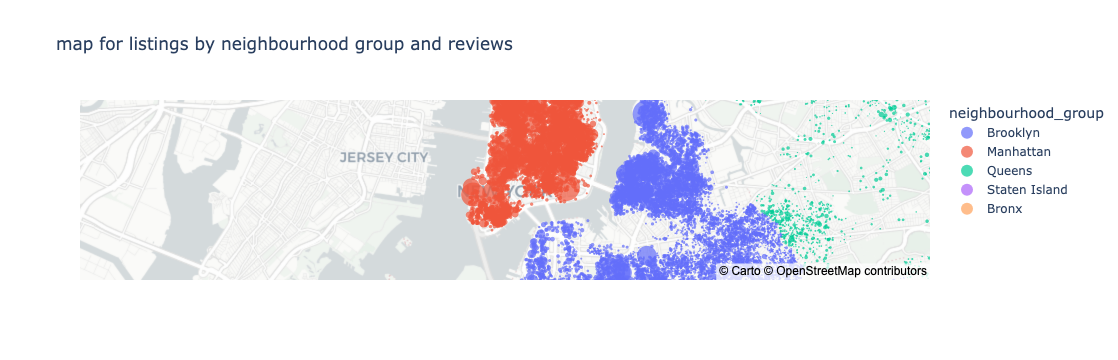

In [11]:
#Use scatter_mapbox to plot latitude and longitude with colors representing neighborhood groups and size based on price.
fig = px.scatter_mapbox(df, 
                        lat = 'latitude', 
                        lon= 'longitude', 
                        color = 'neighbourhood_group', 
                        size = 'price',
                        title = 'map for listings by neighbourhood group and reviews',
                        mapbox_style = "carto-positron",
                        center = {'lat':40.7128, 'lon':-74.0060},
                        zoom = 11
                       )
fig.show()

In [12]:
#In a new cell, Filter the dataset to include only listings from Queens.
df_queens = df[df['neighbourhood_group']=='Queens']



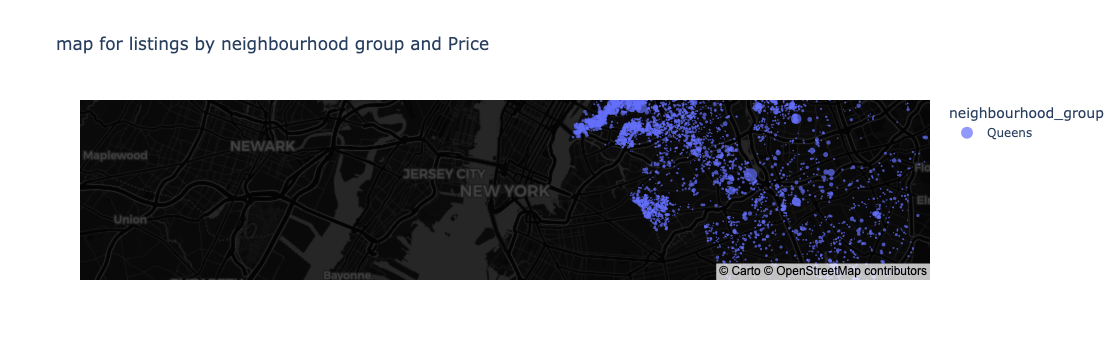

In [13]:
#In a new cell, Generate a scatter mapbox plot for listings in Queens, using neighbourhood for color and price for size.
fig = px.scatter_mapbox(df_queens, 
                        lat = 'latitude', 
                        lon= 'longitude', 
                        color = 'neighbourhood_group', 
                        size = 'price',
                        title = 'map for listings by neighbourhood group and Price',
                        mapbox_style = "carto-darkmatter",
                        center = {'lat':40.7128, 'lon':-74.0060},
                        zoom = 10
                       )
fig.show()


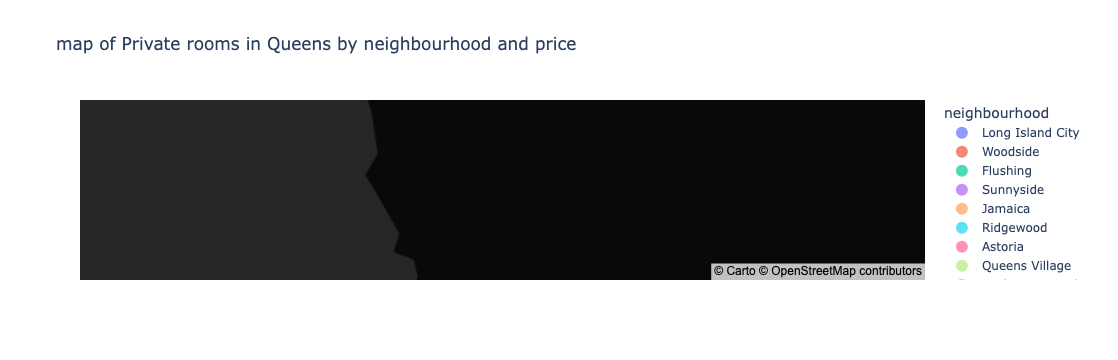

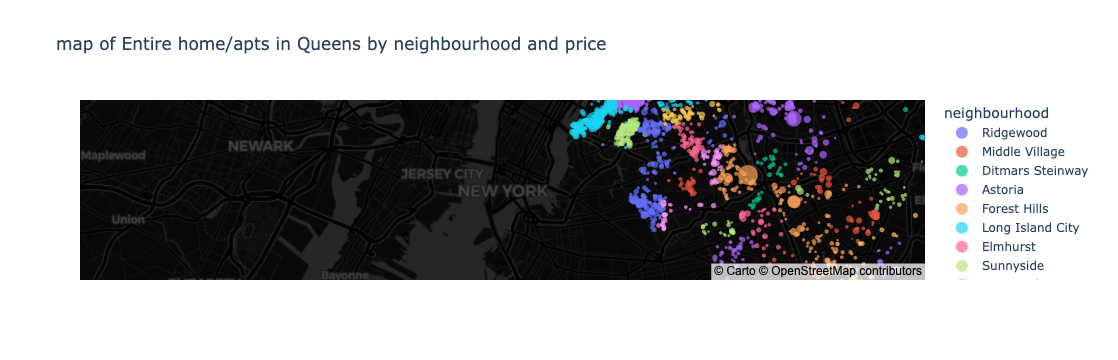

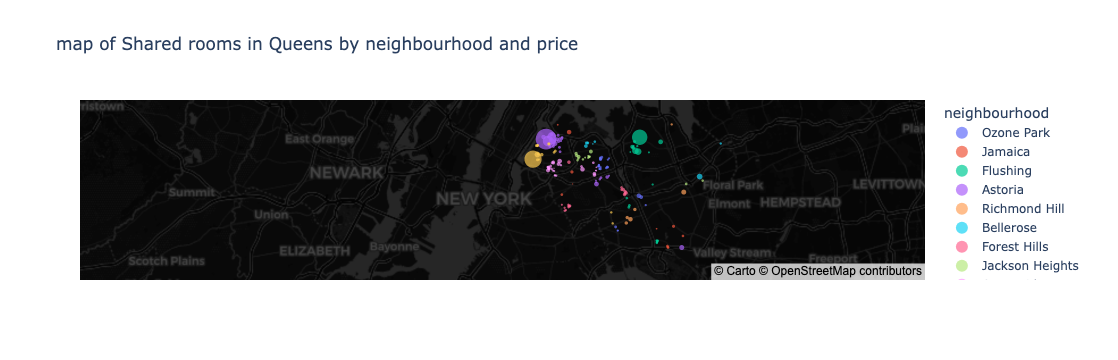

In [18]:
#Define a function to create a map for each room type, filtering the data by room type and plotting the map.
def create_map_for_room_type(room_type):
    df_room_type = df_queens[df_queens['room_type']==room_type]
    
    fig = px.scatter_mapbox(
        df_room_type,
        lat='latitude',
        lon='longitude',
        color = 'neighbourhood',
        size = 'price',
        hover_name = 'name',
        hover_data = {
            'price':True,
            'room_type':True,
            'number_of_reviews':True,
            'availability_365': True
        },
        title = f'map of {room_type}s in Queens by neighbourhood and price',
        mapbox_style = "carto-darkmatter",
        center = {'lat':40.7128, 'lon':-74.0060},
        zoom = 10,
        size_max = 15
    )
    fig.show()
#Extract unique room types from the dataset and loop through them to generate individual maps.
room_types = df_queens['room_type'].unique()

for room_type in room_types:
    create_map_for_room_type(room_type)

In [19]:
# Filter dataset for Queens and shared rooms
df_shared_rooms = df[(df['neighbourhood_group'] == 'Queens') & (df['room_type'] == 'Shared room')]

In [23]:
# Categorize Listings by Number of Reviews, Create bins to categorize listings by the number of reviews (e.g., 0-10, 11-50, 51+ reviews).
# Define bins and labels for categorizing the reviews
bins = [0, 10, 50, float('inf')] 
labels = ['0-10 reviews', '11-50 reviews', '51+ reviews']

df_shared_rooms.loc[:, 'review_category'] = pd.cut(
    df_shared_rooms['number_of_reviews'], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)


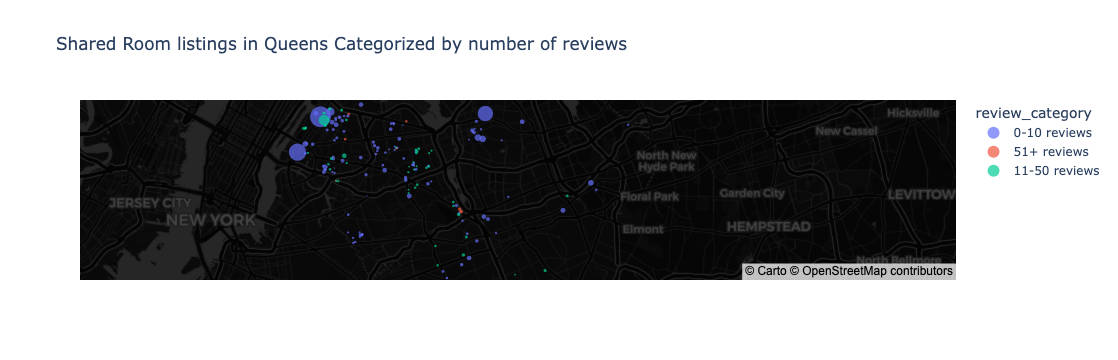

In [27]:
# Define a custom color palette for the categories based on the number of reviews. Plot the filtered dataset of shared rooms using scatter_mapbox, coloring by the review categories and adjusting marker size by price.
fig = px.scatter_mapbox(
    df_shared_rooms,
    lat='latitude',
    lon='longitude',
    color='review_category',  
    size = 'price',  
    hover_name='name',
    hover_data={
        'price':True,
        'number_of_reviews':True,
        'availability_365':True
    },
    title='Shared Room listings in Queens Categorized by number of reviews',
    mapbox_style="carto-darkmatter",     
    center={'lat': 40.7282, 'lon': -73.7949},   
    zoom=10,
    size_max=15
        )
fig.show()

### Group 2 challenge 

In [69]:
df2 = pd.read_csv("S&P.csv", header=1) 
df2.head(3)

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   
1  1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2  1929.0    21.45       0.88          4.10%       3.36%          4.20%   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   
1         4.61%          3.28%         5.60%          3.22%   
2         4.67%          4.14%         5.95%          3.02%   

  Returns on Real Estate  Unnamed: 11  
0                    NaN          NaN  
1                  1.49%          NaN  
2                 -2.06%          NaN

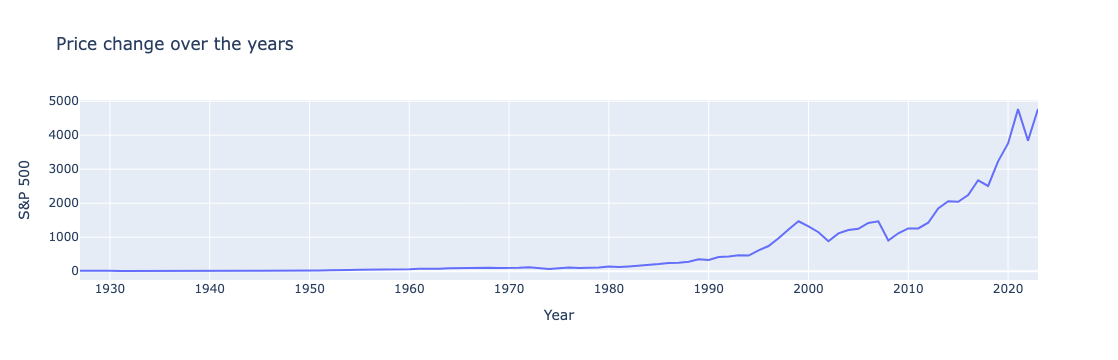

In [35]:
# Create a “line chart” using the px.line function showing how the price of S&P 500 has changed over the years
fig = px.line(df2,
              x="Year",
              y="S&P 500",
              title="Price change over the years")
fig.show()

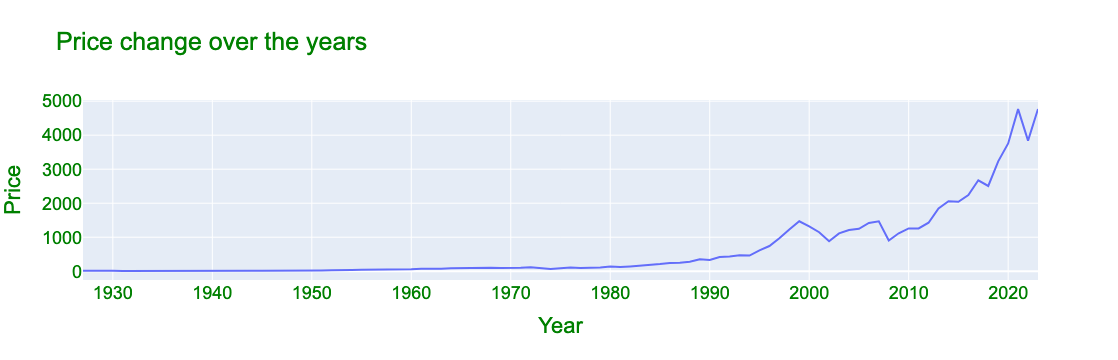

In [44]:
# Customize the chart appearance by changing the line color, the size of the text and the font using fig.update_layout() and fig.update_traces()
fig.update_layout(
    title="Price change over the years",
    xaxis_title="Year",
    yaxis_title="Price",
    font=dict(
        family="Arial, sans-serif",             
        size=18,
        color="green"
    )
)

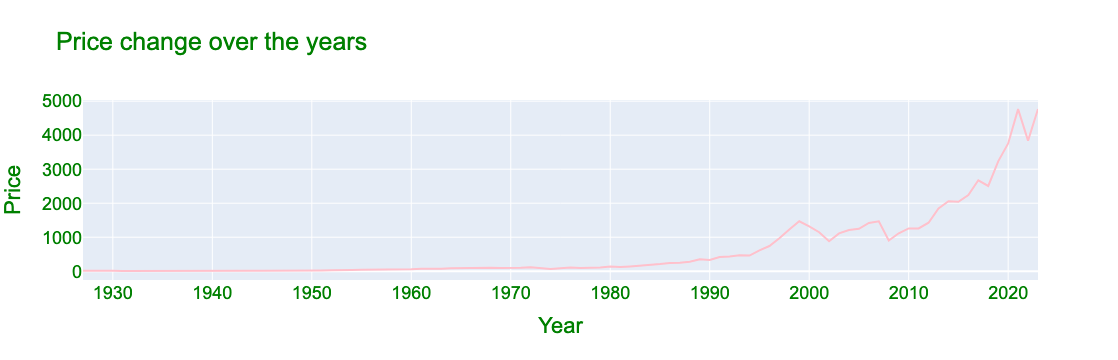

In [45]:
fig.update_traces(line_color="pink",
                  selector=dict(type='scatter') 
                 )

In [62]:
# Add an annotation including a hovertext to the chart using fig.add_annotation()
fig.layout.annotations = []  # Clear existing annotations


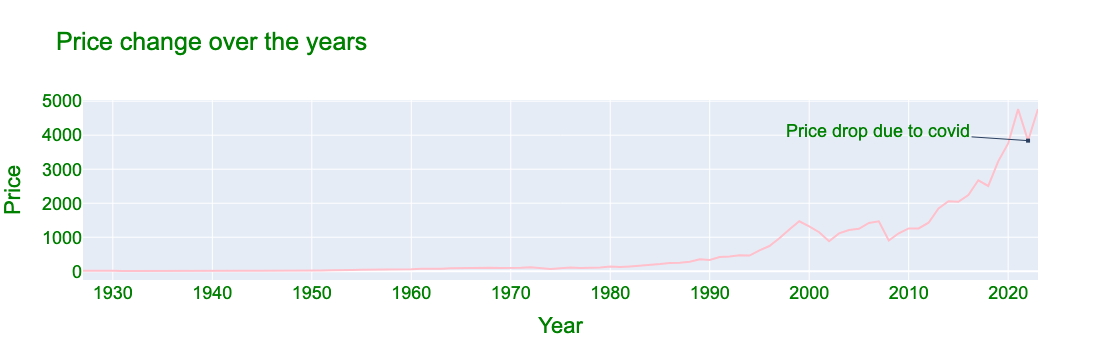

In [63]:
fig.add_annotation(
    x="2022",
    y=3839.5,
    text="Price drop due to covid",
    showarrow=True,
    arrowhead=7,
    ax=-150,
    ay=-10,
    hovertext="covid 19 was a pandemic lasting from 2020 until 2023 <br> This is me creating a second line",
    hoverlabel=dict(
        bgcolor="white",
        bordercolor="black",
        font=dict(
            color="black"
        )
    )
)

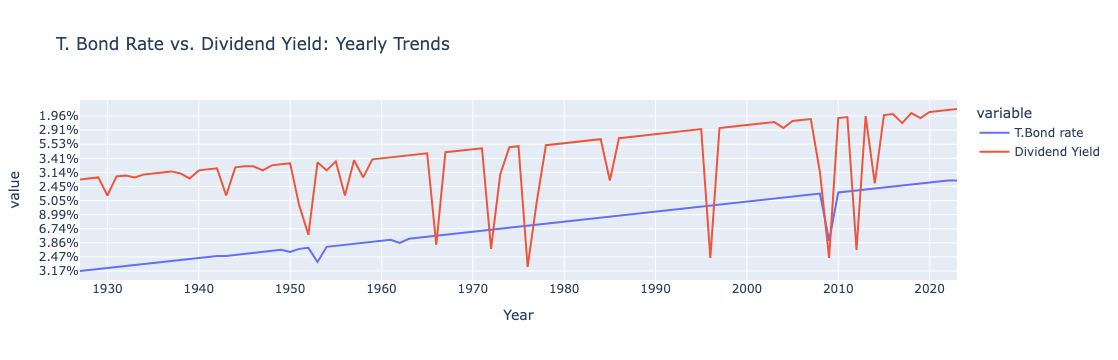

In [65]:
# Create another line chart with two new values (make sure if they are percentages that both of your columns are percentages).
fig = px.line(df2,
              x="Year",
              y=["T.Bond rate", "Dividend Yield"],
              title="T. Bond Rate vs. Dividend Yield: Yearly Trends")
fig.show()

### Group 3 challenge

In [68]:
df3=pd.read_csv("country_wise_latest.csv")
df3.head(3)

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa

In [71]:
df3.describe()

Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635            3.454302              26.287694   
min       0.000000       0.000000            0.000000               0.000000   
25%       0.000000       0.000000            0.945000              48.770000   
50%       1.000000      22.000000            2.150000              71.320000   
75%       6.000000     221.000000            3.875000              86.885000   
max    1076.000000   33728.000000           28.560000             100.000000   

       Deaths / 100 Recovered  Confirmed last week  1 week change  \
count                  187.00         1.870000e+02     187.000000   
mean                      inf         7.868248e+04    9448.459893   
std                       NaN         3.382737e+05   47491.127684   
min                      0.00         1.000000e+01     -47.000000   
25%                      1.45         1.051500e+03      49.000000   
50%                      3.62         5.020000e+03     432.000000   
75%                      6.44         3.708050e+04    3172.000000   
max                       inf         3.834677e+06  455582.000000   

       1 week % increase  
count         187.000000  
mean           13.606203  
std            24.509838  
min            -3.840000  
25%             2.775000  
50%             6.890000  
75%            16.855000  
max           226.320000

In [72]:
df3.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [73]:
df3.drop_duplicates()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

### In a new code cell, create and show a scatter plot.
### Use the px.scatter() function to generate a scatter plot.
### X-Axis: Assign the 'Confirmed' column to the x-axis.
### Y-Axis: Assign the 'Deaths' column to the y-axis.
### Title: Add a descriptive title.
### Call the show() method to display the plot.


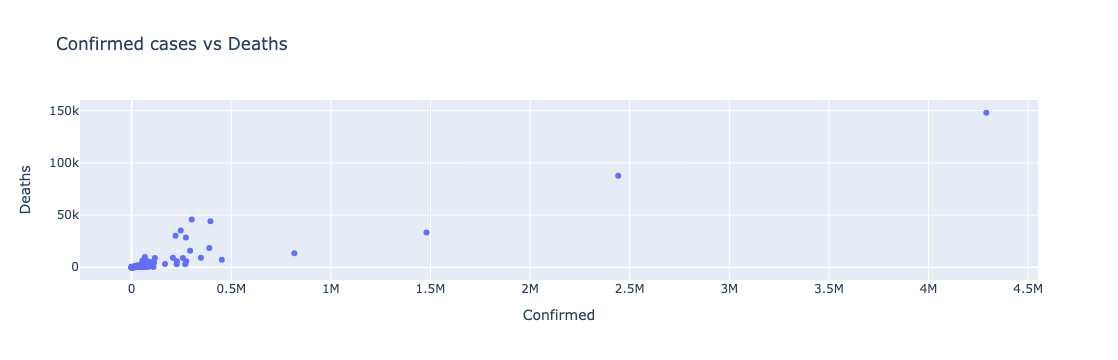

In [74]:
fig=px.scatter(df3,
               x='Confirmed',
               y='Deaths',
               title='Confirmed cases vs Deaths'
              )
fig.show()

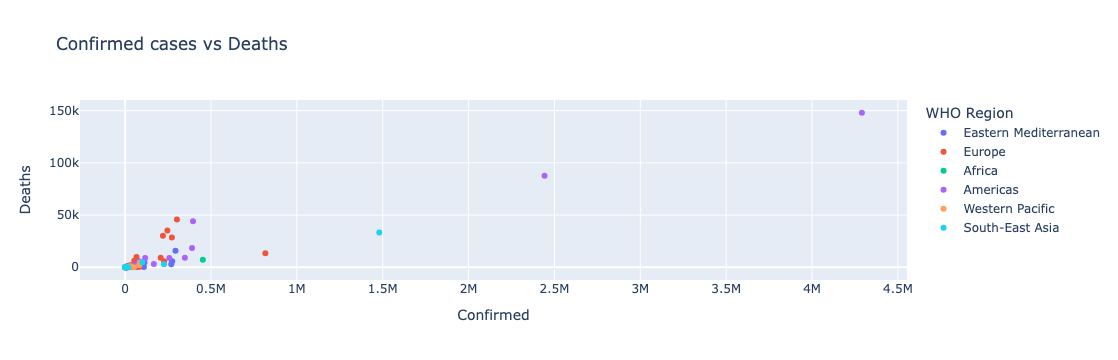

In [75]:
# In a new code cell, let’s add color to the scatter plot by modifying the px.scatter() function to include color argument, specifying the column you want to color (e.g., ‘WHO Region’) and then display the plot.
fig=px.scatter(df3,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               title='Confirmed cases vs Deaths'
              )
fig.show()

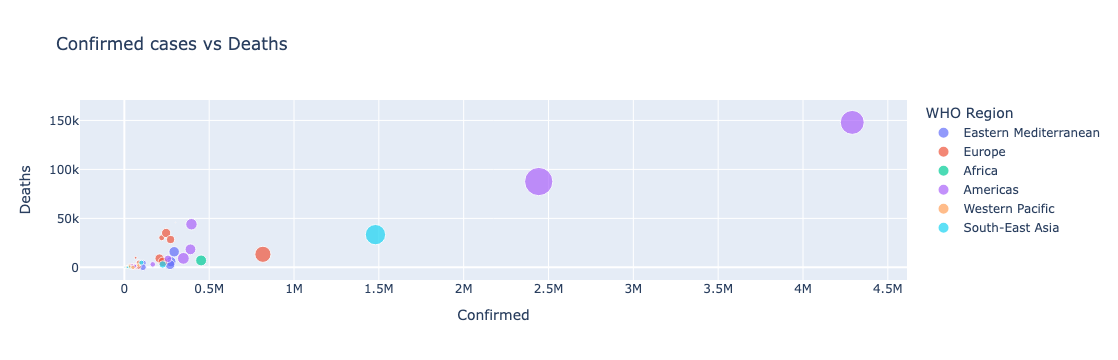

In [76]:
# In a new code cell, let’s add size to the scatter plot
fig=px.scatter(df3,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Confirmed cases vs Deaths'
              )
fig.show()

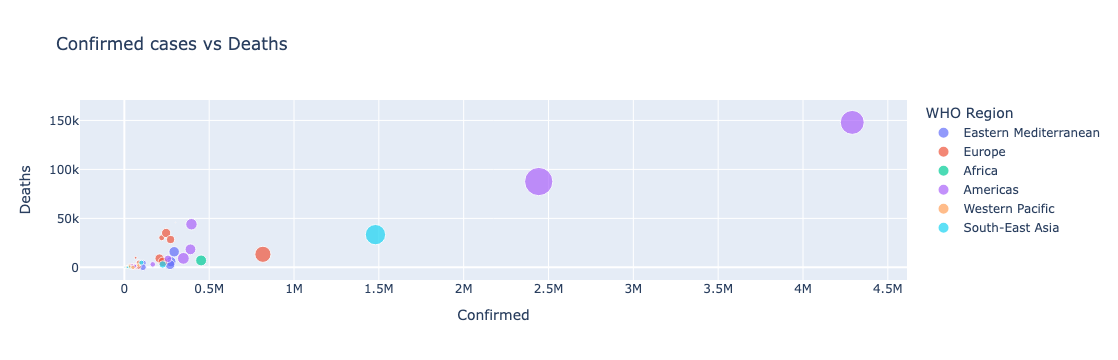

In [77]:
# In a new code cell, add hover information
# Using hover to display the information like Country/Region, Active cases, and New cases.
fig=px.scatter(df3,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases']
              )
fig.show()

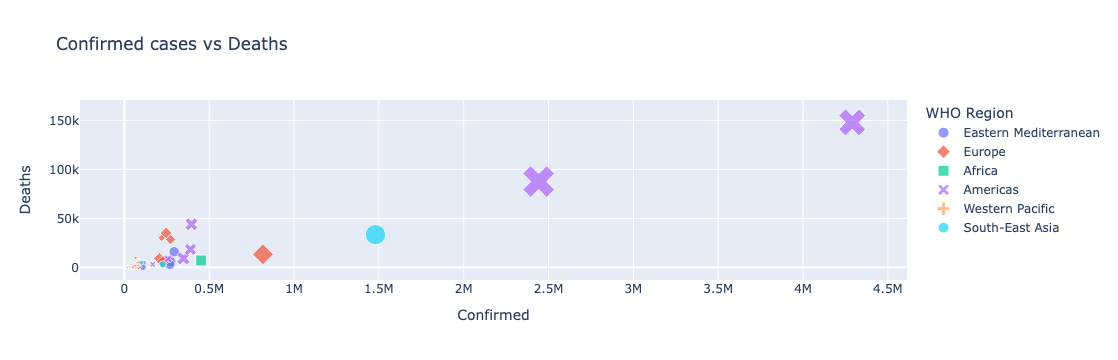

In [78]:
# In a new code cell, let’s add symbol to the scatter plot.
# Use symbol mapping to map different marker symbols for WHO Region, which will make the plot even more visually distinct.
fig=px.scatter(df3,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases'],
               symbol='WHO Region'
              )
fig.show()

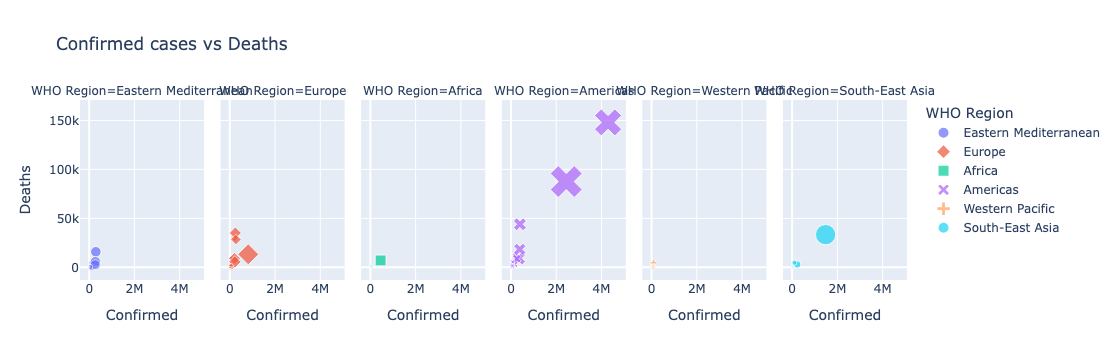

In [80]:
# In a new code cell, add facet_col to scatter plot to create separate subplots (facets) for ‘WHO Region’.
fig=px.scatter(df3,
               x='Confirmed',
               y='Deaths',
               color='WHO Region',
               size='Recovered',
               title='Confirmed cases vs Deaths',
               hover_data=['Country/Region','Active','New cases'],
               symbol='WHO Region',
               facet_col='WHO Region'
              )
fig.show()